In [1]:
%matplotlib widget
from bmcs_shear.matmod.sz_concrete.sz_advanced import ConcreteMaterialModelAdv
import numpy as np
# w = np.linspace(0,1,100)
# print(ConcreteMaterialModel.get_sigma_w(w))

In [2]:
ccm = ConcreteMaterialModelAdv()

In [3]:
ConcreteMaterialModelAdv().interact()

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less_equal(f_c/E_c, -w/L_cr),less_equal(w, L_cr*f_t/E_c),less_equal(w, 0.14392*d_a**0.32*f_c**0.18/f_t),True], [-f_c,E_c*w/L_cr,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*w),select([greater(w, L_cr*f_t/E_c)], [-0.62*s*(s**2/w**2 + 1)**(-0.25)*select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan)/sqrt(w)], default=nan)], default=nan)


In [4]:
ccm.w_cr

0.04259858105196991

In [5]:
w = np.linspace(-1,1, 100)
s = np.linspace(-1,1, 100)
ccm.get_sigma_ag(w,s)

AttributeError: 'ConcreteMaterialModelAdv' object has no attribute 'get_sigma_ag'

In [ ]:
ccm.get_w_tc()

In [6]:
import sympy as sp
w = sp.Symbol('w')

sp.sign(w)

sign(w)

In [7]:
get_sign = sp.lambdify(w, sp.sign(w))
get_sign

<function _lambdifygenerated(w)>

In [8]:
import numpy as np
w_ = np.linspace(-4,0, 100)
s_ = np.linspace(-2,2, 10)
#w_a =  2 - 1/2 * (get_sign(w_ )) * w_ #* w_  #* w_ 1/2 *   1 - 1/2 * + 1
#w_a = get_sign(w_ - 1/2) * (w_)
#w_a =
w_1 = get_sign(w_ + 1/34) * (w_ + 1e-9)#+ 1e-9) #+ 1/34
w_1, w_

(array([4.00000000e+00, 3.95959596e+00, 3.91919192e+00, 3.87878788e+00,
        3.83838384e+00, 3.79797980e+00, 3.75757576e+00, 3.71717172e+00,
        3.67676768e+00, 3.63636364e+00, 3.59595959e+00, 3.55555555e+00,
        3.51515151e+00, 3.47474747e+00, 3.43434343e+00, 3.39393939e+00,
        3.35353535e+00, 3.31313131e+00, 3.27272727e+00, 3.23232323e+00,
        3.19191919e+00, 3.15151515e+00, 3.11111111e+00, 3.07070707e+00,
        3.03030303e+00, 2.98989899e+00, 2.94949495e+00, 2.90909091e+00,
        2.86868687e+00, 2.82828283e+00, 2.78787879e+00, 2.74747475e+00,
        2.70707071e+00, 2.66666667e+00, 2.62626263e+00, 2.58585858e+00,
        2.54545454e+00, 2.50505050e+00, 2.46464646e+00, 2.42424242e+00,
        2.38383838e+00, 2.34343434e+00, 2.30303030e+00, 2.26262626e+00,
        2.22222222e+00, 2.18181818e+00, 2.14141414e+00, 2.10101010e+00,
        2.06060606e+00, 2.02020202e+00, 1.97979798e+00, 1.93939394e+00,
        1.89898990e+00, 1.85858586e+00, 1.81818182e+00, 1.777777

In [9]:
s_, w_1 = np.meshgrid(s_, w_1)

In [10]:
#ccm.get_sig_a(w_, s_)
sig_a, tau_a = ccm.get_sig_a(w_1, s_)

TypeError: get_sig_a() takes 2 positional arguments but 3 were given

In [11]:
tau_a

NameError: name 'tau_a' is not defined

In [12]:
import matplotlib.pyplot as plt
plt.subplots(1, 1)
ax_s = plt.axes(projection='3d')
ax_s.plot_surface(w_1, s_, tau_a, cmap='viridis', edgecolor='none')
ax_s.set_xlabel(r'$w\;\;\mathrm{[mm]}$')
ax_s.set_ylabel(r'$s\;\;\mathrm{[mm]}$')
ax_s.set_zlabel(r'$\tau\;\;\mathrm{[MPa]}$')

NameError: name 'tau_a' is not defined

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

In [14]:
w = sp.Symbol(r'w', real=True)
s = sp.Symbol(r's', real = True)
d_a, E_c = sp.symbols(r'd_a, E_c', nonnegative=True)
f_t = sp.symbols(r'f_t', nonnegative=True)
c_2 = sp.Symbol('c_2', nonnegative=True)
c_1 = sp.Symbol('c_1', nonnegative=True)
f_c = sp.Symbol('f_c', nonnegative =True)
#G_f, L_c = sp.symbols('G_f, L_c', nonnegative = True)

In [90]:
G_f = 0.028 * f_c ** 0.18 * d_a ** 0.32

L_cr = E_c * G_f / f_t ** 2

w_cr = f_t / E_c * L_c

f_w = f_t * sp.exp(-f_t * w / G_f)

w_x = 5.14 * (G_f / f_t)

r = s / w

tau_0 = 0.25 * f_c

In [91]:
tau_s = sp.Piecewise(
        (0, w <= 0),
        (tau_0 * (1 - sp.sqrt((2 * w) / d_a)) * r * (a_3 + (a_4 * np.abs(r) ** 3)) / (1 + (a_4 * r ** 4)), w > 0)

    )

In [92]:
sigma_ag = sp.Piecewise(
        (0, w == w_cr),
        (-0.62 * sp.sqrt(w) * (r) / (1 + r ** 2) ** 0.25 * tau_s, w > w_cr)
    )

In [93]:
sig_w = sp.Piecewise(
        (-f_c, w / L_cr <= - f_c / E_c),
        (E_c * w / L_cr, w <= w_cr),
        (f_w, w <= w_x),
        (sigma_ag, True)
    )

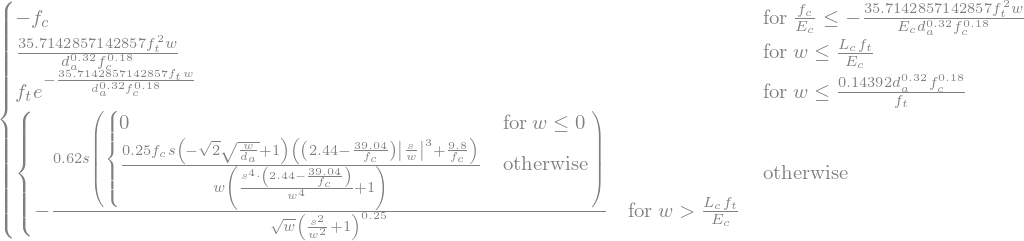

In [94]:
sig_w

In [95]:
params = {
    d_a : 22,
    E_c : 28000,
    f_t : 3,
    c_2 : 6,
    c_1 : 3,
    f_c : 30
}

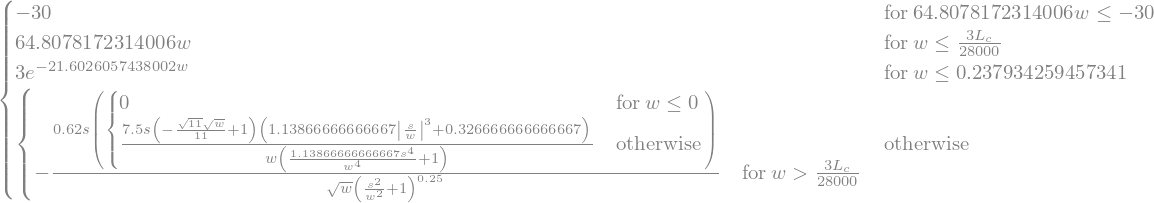

In [96]:
get_sig_w = sp.lambdify((w), sig_w.subs(params), 'numpy')
sig_w.subs(params)

In [88]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = np.linspace(-1,1, 100)
sig = get_sig_w(w_)
ax1.plot(w_, sig, color='blue', lw=2);

TypeError: cannot determine truth value of Relational

In [21]:
print(sig)

[-30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.                  nan          nan
 -20.96494757 -28.52314913 -29.90033215 -26.3899619  -12.39267196
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan   

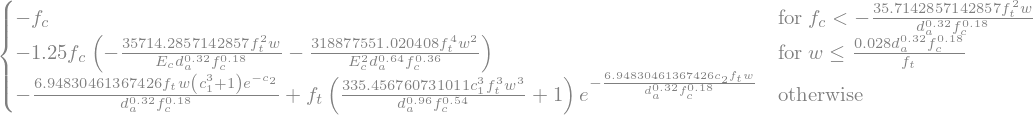

In [22]:
f_ce = f_c * (1 / (0.8))
sig_w = sp.Piecewise(
        (- f_c, E_c * w / L_c < - f_c),
        (- f_ce * (2 * (eps_p / -0.002) - (eps_p / -0.002) ** 2), w <= w_cr),
        (f_t * (1 + ((c_1 * w)/(w_tc))**3) * sp.exp((-c_2* w)/(w_tc)) - (w/w_tc) * \
        (1 + c_1**3) * sp.exp(-c_2), w > w_cr)
    )
sig_w

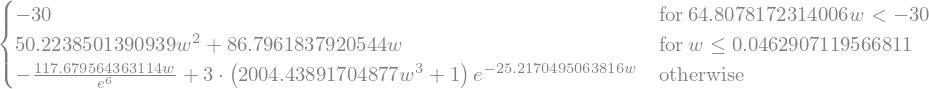

In [23]:
get_sig_w = sp.lambdify((w), sig_w.subs(params), 'numpy')
sig_w.subs(params)

In [24]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = np.linspace(-1,1, 100)
sig = get_sig_w(w_)
ax1.plot(w_, sig, color='blue', lw=2);

In [25]:
sig

array([-3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -2.90759823e+01,
       -2.82244113e+01, -2.73318455e+01, -2.63982848e+01, -2.54237293e+01,
       -2.44081788e+01, -2.33516335e+01, -2.22540933e+01, -2.11155582e+01,
       -1.99360282e+01, -1.87155034e+01, -1.74539837e+01, -1.61514691e+01,
       -1.48079596e+01, -1.34234552e+01, -1.19979560e+01, -1.05314619e+01,
       -9.02397289e+00, -7.47548902e+00, -5.88601028e+00, -4.25553665e+00,
       -2.58406815e+00, -8.71604769e-01,  8.81853489e-01,  2.67630663e+00,
        1.04151832e+00,  

In [26]:
w_

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

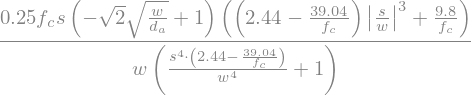

In [27]:
r = s / w

tau_0 = 0.25 * f_c

a_3 = 2.45 / tau_0

a_4 = 2.44 * (1 - (4 / tau_0))
tau_s = tau_0 * (1 - sp.sqrt((2 * w) / d_a)) * r * (a_3 + (a_4 * sp.Abs(r) ** 3)) / (1 + (a_4 * r ** 4))
tau_s

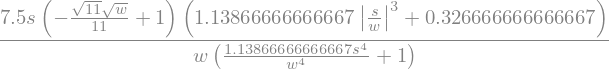

In [28]:
get_tau_s = sp.lambdify((w,s), tau_s.subs(params), 'numpy')
tau_s.subs(params)

In [29]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = np.linspace(0,1, 100)
s_ = np.linspace(-1,1, 100)
tau = get_tau_s(w_, s_)
ax1.plot(s_, tau, color='blue', lw=2);

<lambdifygenerated-10>:2: RuntimeWarning: divide by zero encountered in divide
  return 7.5*s*(-1/11*sqrt(11)*sqrt(w) + 1)*(1.13866666666667*abs(s/w)**3 + 0.326666666666667)/(w*(1.13866666666667*s**4/w**4 + 1))
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in multiply
  return 7.5*s*(-1/11*sqrt(11)*sqrt(w) + 1)*(1.13866666666667*abs(s/w)**3 + 0.326666666666667)/(w*(1.13866666666667*s**4/w**4 + 1))


In [30]:
w = sp.Symbol(r'w', real=True)
s = sp.Symbol(r's', real = True)
d_a, E_c = sp.symbols(r'd_a, E_c', nonnegative=True)
f_t = sp.symbols(r'f_t', nonnegative=True)
c_2 = sp.Symbol('c_2', nonnegative=True)
c_1 = sp.Symbol('c_1', nonnegative=True)
f_c = sp.Symbol('f_c', nonnegative =True)
#G_f, L_c = sp.symbols('G_f, L_c', nonnegative = True)

In [31]:
G_f = 0.028 * f_c ** 0.18 * d_a ** 0.32

L_c = E_c * G_f / f_t ** 2

w_cr = f_t / E_c * L_c

eps_cp = w_cr / L_c

eps_p = w / L_c

f_co = 2 * f_t

w_tc = 5.14 * G_f / f_t

In [32]:
sig_w = sp.Piecewise(
        (- f_c, w < - w_cr),
        (-(f_co + (f_c - f_co) * sp.sqrt(1 - ((eps_cp - eps_p) / (eps_cp)) ** 2)), - w_cr < w ),
        (- 2 * f_t, w == 0),
        (E_c * eps_p, E_c * w / L_c <= f_t),
        (f_t * (1 + ((c_1 * w)/(w_tc))**3) * sp.exp((-c_2* w)/(w_tc)) - (w/w_tc) * \
        (1 + c_1**3) * sp.exp(-c_2), w > w_cr)
    )

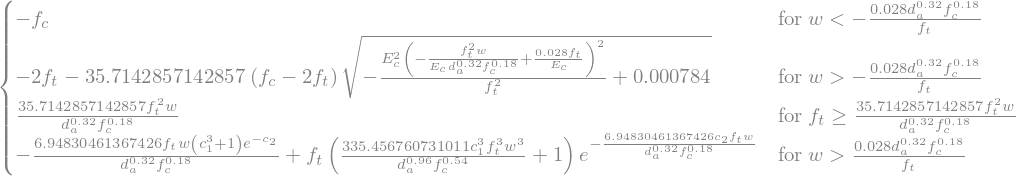

In [33]:
sig_w

In [34]:
params = {
    d_a : 22,
    E_c : 28000,
    f_t : 3,
    c_2 : 6,
    c_1 : 3,
    f_c : 30
}

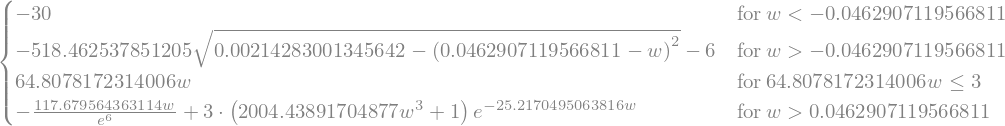

In [35]:
get_sig_w = sp.lambdify((w), sig_w.subs(params), 'numpy')
sig_w.subs(params)

In [36]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = np.linspace(-1,1, 100)
sig = get_sig_w(w_)
ax1.plot(w_, sig, color='blue', lw=2);

<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less(w, -0.0462907119566811),greater(w, -0.0462907119566811),less_equal(64.8078172314006*w, 3),greater(w, 0.0462907119566811)], [-30,-518.462537851205*sqrt(0.00214283001345642 - (0.0462907119566811 - w)**2) - 6,64.8078172314006*w,-117.679564363114*w*exp(-6) + 3*(2004.43891704877*w**3 + 1)*exp(-25.2170495063816*w)], default=nan)


In [37]:
print(sig)

[-30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.         -30.         -30.
 -30.         -30.         -30.                  nan          nan
 -20.96494757 -28.52314913 -29.90033215 -26.3899619  -12.39267196
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan   

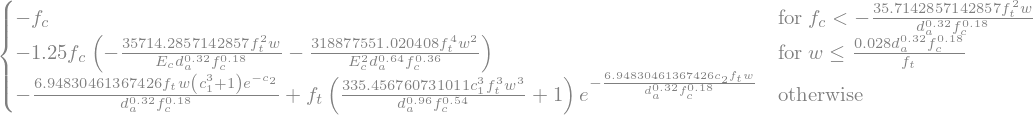

In [38]:
f_ce = f_c * (1 / (0.8))
sig_w = sp.Piecewise(
        (- f_c, E_c * w / L_c < - f_c),
        (- f_ce * (2 * (eps_p / -0.002) - (eps_p / -0.002) ** 2), w <= w_cr),
        (f_t * (1 + ((c_1 * w)/(w_tc))**3) * sp.exp((-c_2* w)/(w_tc)) - (w/w_tc) * \
        (1 + c_1**3) * sp.exp(-c_2), w > w_cr)
    )
sig_w

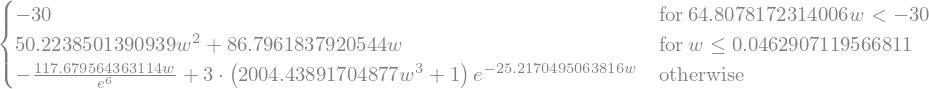

In [39]:
get_sig_w = sp.lambdify((w), sig_w.subs(params), 'numpy')
sig_w.subs(params)

In [40]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = np.linspace(-1,1, 100)
sig = get_sig_w(w_)
ax1.plot(w_, sig, color='blue', lw=2);

In [41]:
sig

array([-3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -3.00000000e+01,
       -3.00000000e+01, -3.00000000e+01, -3.00000000e+01, -2.90759823e+01,
       -2.82244113e+01, -2.73318455e+01, -2.63982848e+01, -2.54237293e+01,
       -2.44081788e+01, -2.33516335e+01, -2.22540933e+01, -2.11155582e+01,
       -1.99360282e+01, -1.87155034e+01, -1.74539837e+01, -1.61514691e+01,
       -1.48079596e+01, -1.34234552e+01, -1.19979560e+01, -1.05314619e+01,
       -9.02397289e+00, -7.47548902e+00, -5.88601028e+00, -4.25553665e+00,
       -2.58406815e+00, -8.71604769e-01,  8.81853489e-01,  2.67630663e+00,
        1.04151832e+00,  

In [42]:
w_

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

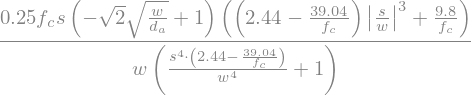

In [43]:
r = s / w

tau_0 = 0.25 * f_c

a_3 = 2.45 / tau_0

a_4 = 2.44 * (1 - (4 / tau_0))
tau_s = tau_0 * (1 - sp.sqrt((2 * w) / d_a)) * r * (a_3 + (a_4 * sp.Abs(r) ** 3)) / (1 + (a_4 * r ** 4))
tau_s

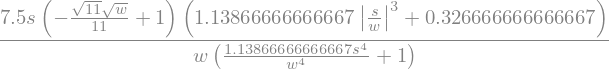

In [44]:
get_tau_s = sp.lambdify((w,s), tau_s.subs(params), 'numpy')
tau_s.subs(params)

In [45]:
_, (ax1) = plt.subplots(1, 1, figsize=(10,5))
w_ = np.linspace(0,1, 100)
s_ = np.linspace(-1,1, 100)
tau = get_tau_s(w_, s_)
ax1.plot(s_, tau, color='blue', lw=2);

<lambdifygenerated-13>:2: RuntimeWarning: divide by zero encountered in divide
  return 7.5*s*(-1/11*sqrt(11)*sqrt(w) + 1)*(1.13866666666667*abs(s/w)**3 + 0.326666666666667)/(w*(1.13866666666667*s**4/w**4 + 1))
<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in multiply
  return 7.5*s*(-1/11*sqrt(11)*sqrt(w) + 1)*(1.13866666666667*abs(s/w)**3 + 0.326666666666667)/(w*(1.13866666666667*s**4/w**4 + 1))


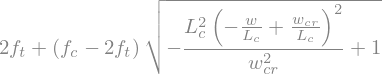

In [46]:
import sympy as sp
w_cr, w, L_c = sp.symbols('w_cr, w, L_c')
eps_cp = w_cr / L_c
eps_p = w / L_c
sigma_ = 2 *f_t + (f_c - 2 * f_t) * sp.sqrt(1 - ((eps_cp - eps_p) / (eps_cp))**2)
sigma_

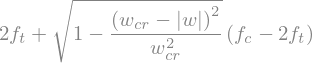

In [47]:
sig_ = sp.simplify(sigma_)
sig_w = 2 * f_t + (f_c - 2 * f_t) * sp.sqrt(1 - ((w_cr - sp.Abs(w)) / (w_cr))**2)
sig_w

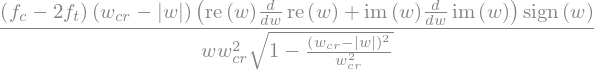

In [48]:
sig_w.diff(w)

In [49]:
params = {
    f_t : 3,
    f_c : -30,
    w_cr : 0.1
}

In [50]:
get_sig_val = sp.lambdify(w, sig_w.subs(params), 'numpy')
get_sig_val

<function _lambdifygenerated(w)>

In [51]:
_, ax = plt.subplots(1,1)
w_ = np.linspace(-0.1, 0, 100)
sig_val_ = get_sig_val(w_)
ax.plot(w_, sig_val_)

<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in sqrt
  return 6 - 360.0*sqrt(0.01 - (0.1 - abs(w))**2)


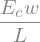

In [52]:
E_c, L, w = sp.symbols('E_c, L, w')
sig_w = E_c * w / L
sig_w

In [53]:
params = {
    E_c : 28000,
    L : 20000
}

In [54]:
get_sig_w = sp.lambdify((w), sig_w.subs(params), 'numpy')
get_sig_w

<function _lambdifygenerated(w)>

In [55]:
_, ax = plt.subplots(1,1)
w_1 = np.linspace(0, 0.1, 100)
sig_val_ = get_sig_w(w_1)
ax.plot(w_1, sig_val_)

In [56]:
f_t = sp.symbols(r'f_t', nonnegative=True)
c_2 = sp.Symbol('c_2', nonnegative=True)
c_1 = sp.Symbol('c_1', nonnegative=True)
f_c = sp.Symbol('f_c', nonnegative =True)
G_f, L_c = sp.symbols('G_f, L_c', nonnegative = True)

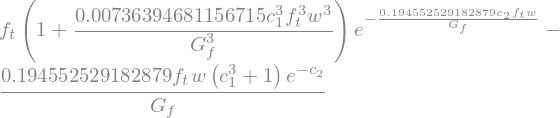

In [57]:
G_f, f_t = sp.symbols('G_f, f_t')
w_tc = 5.14 * G_f/f_t
sigma_t = f_t * (1 + ((c_1 * w)/(w_tc))**3) * sp.exp((-c_2* w)/(w_tc)) - (w/w_tc) * (1 + c_1**3) * sp.exp(-c_2)
sigma_t

In [58]:
params = {
    c_1 : 3,
    c_2 : 6.93,
    G_f : 0.5,
    f_t : 3
}

In [59]:
get_sigma_t = sp.lambdify(w, sigma_t.subs(params))
sigma_t.subs(params)

In [60]:
_, ax = plt.subplots(1,1)
w_ = np.linspace(0.1, 0.85, 100)
sig_t = get_sigma_t(w_)
ax.plot(w_, sig_t)

In [61]:
sig_w_ = sp.Piecewise(
            (- f_c, w < - w_cr),
            (2 * f_t + (-f_c - 2 * f_t) * sp.sqrt(1 - ((w_cr - sp.Abs(w)) / (w_cr))**2), w < 0),
            (E_c * w / L,  w < w_cr),
            (f_t * (1 + ((c_1 * w)/(w_tc))**3) * sp.exp((-c_2* w)/(w_tc)) - (w/w_tc) * (1 + c_1**3) * sp.exp(-c_2), w > w_cr)
)

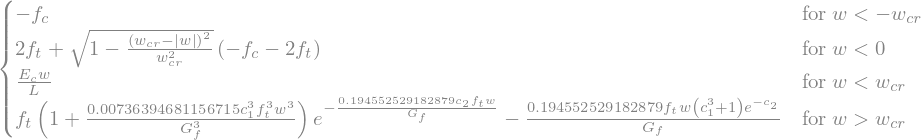

In [62]:
sig_w_

In [63]:
params = {
    c_1 : 3,
    c_2 : 6.93,
    G_f : 0.5,
    f_t : 3,
    f_c : 30,
    E_c : 28000,
    L: 20000,
    L_c : 435,
    w_cr : 0.1
}

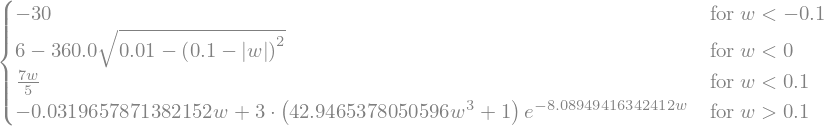

In [64]:
get_sigma_w = sp.lambdify(w, sig_w_.subs(params), 'numpy')
sig_w_.subs(params)

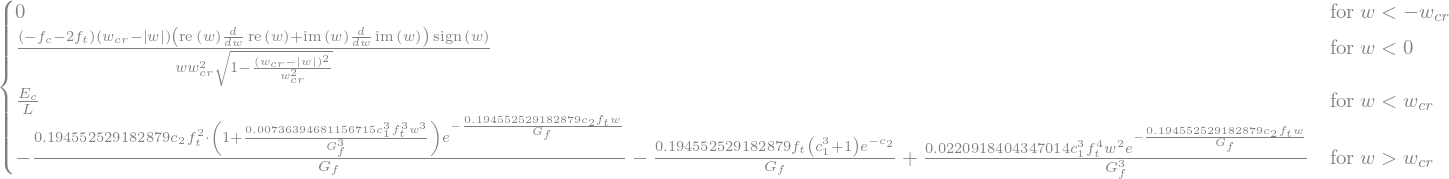

In [65]:
sig_w_d = sig_w_.diff(w)
sig_w_d

In [66]:
#get_sig_w_d = sp.lambdify(w, sig_w_d.subs(params), 'numpy')
#sig_w_diff.subs(params)

In [68]:
_, ax = plt.subplots(1,1)
w_ = np.linspace(-1,1, 100)
sig_w_ = get_sigma_w(w_)
#sig_w_diff = get_sig_w_diff(w_)
ax.plot(w_, sig_w_, color = 'red')
ax.fill_between(w_, sig_w_, color='red', alpha=0.2)

<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less(w, -0.1),less(w, 0),less(w, 0.1),greater(w, 0.1)], [-30,6 - 360.0*sqrt(0.01 - (0.1 - abs(w))**2),(7/5)*w,-0.0319657871382152*w + 3*(42.9465378050596*w**3 + 1)*exp(-8.08949416342412*w)], default=nan)


In [ ]:
#sig_w_d = get_sig_w_d(w_)
#ax.plot(w_, sig_w_d, color = 'orange')